In [2]:
#%pip install ezdxf
#%pip install imutils

# IMAGE-CAD-ANSYS Interface (I CAN)

## _Versión 0.1_
### Author: Jorge Cárdenas
### Pontificia Universidad de Valparaíso
This development is intended to provide an interface to access HFSS, in order to automate simulation and optimization processes.

## Features

- Extract features based on HSV color mapping
- Create DXF file to be loaded into HFSS

In [1]:
"""When working in Dev mode"""
import sys  
sys.path.insert(0, '../druida_V01/src/')

"""when working in Production mode"""
#%pip install druidaHFSS

'when working in Production mode'

In [2]:

import os

from __future__ import print_function

from druida.tools.utils import CAD 


In [3]:
images_folder=r"C:\\Users\\jorge\\Documents\\Projects Jorge C\\DRUIDA PROJECT\\POC\\HFSS CAD\\images\\"
destination_folder=r"C:\\Users\\jorge\\Documents\\Projects Jorge C\\DRUIDA PROJECT\\POC\\HFSS CAD\\processed\\"


ImageProcessor=CAD(images_folder, destination_folder)

## Conductor Feature Extraction

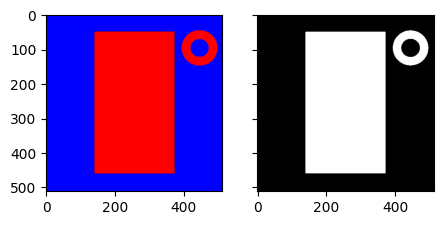

In [4]:
upperBound=[50,255,255]
lowerBound=[0,80,80]
image='images/test1.png'
epsilon_coeff=0.0500
threshold_Value=0
contour_name="RED"

red_cnts,size=ImageProcessor.colorContour(upperBound, lowerBound,image,epsilon_coeff, threshold_Value,contour_name)


## Dielectric Feature Extraction

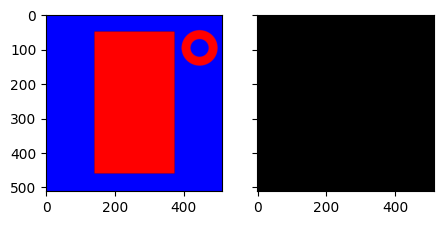

In [5]:

upperBound=[90, 255,255]
lowerBound=[36, 100, 0]
image='images/test1.png'
epsilon_coeff=0.0500
threshold_Value=100
contour_name="GREEN"

green_cnts,size=ImageProcessor.colorContour(upperBound, lowerBound,image,epsilon_coeff, threshold_Value,contour_name)


## Substrate Feature Extraction

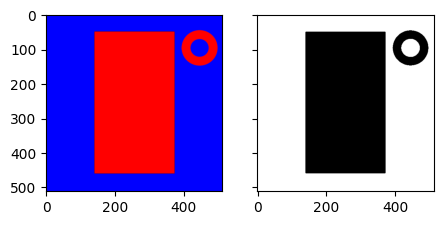

In [6]:
upperBound=[255,255,255]
lowerBound=[20,0,0]
image='images/test1.png'
epsilon_coeff=0.0500
threshold_Value=0
contour_name="BLUE"

blue_cnts,size=ImageProcessor.colorContour(upperBound, lowerBound,image,epsilon_coeff, threshold_Value,contour_name)


## DXF Generator

In [11]:
units="um"
GoalSize=500
currentSize=size[0] #assumming an squared image same witdth and height
multiplier=0
layerscale=0

if units=="mm":
    multiplier=0.1
    layerscale=1
elif units=="um":
    multiplier=10
    layerscale=1000
else:
    pass


"""Here the original layers were given in mm
as the target units are nm, layers must be rescaled
"""

layers= {
        "conductor":{
            "thickness":0.01*layerscale,
            "material":"pec",
            "color": "red",
            "zpos":1.75*layerscale
        },
        "dielectric":{
            "thickness":0.8*layerscale,
            "material":"PTFE",
            "color": "green",
            "zpos":1.75*layerscale

        } ,
        "substrate":{
            "thickness":1.75*layerscale,
            "material":"Rogers RT/duroid 5880 (tm)",
            "color": "blue",
            "zpos":0

        }
    }

"""We can chose the layers to be included in DXF file to be exporte to HFSS"""
selectedLayer = ["conductor", "dielectric", "substrate"]

In [12]:
ImageProcessor.DXF_build(multiplier, GoalSize,currentSize,red_cnts, blue_cnts,green_cnts, selectedLayer)


In [13]:
"""This section allows to include information previously known from layers in HFSS model 
to recreate the model """

#This info is usuarlly included when generating data by using
# the data generation module

kwargs={
        "reports":"",
        "simulation_id":"simID",
    "variable_name":"variables",
        "value" : str([]),
        "units" : units,
    }
        


In [14]:
ImageProcessor.elevation_file(layers,**kwargs)